In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X, Y  = make_circles(n_samples, noise = 0.03, random_state = 42)



In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": Y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


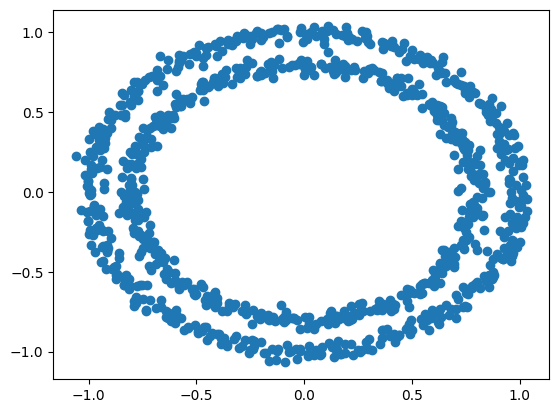

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics = ["accuracy"])
model_1.fit(X, Y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0647 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8779 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8257 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9488 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4432 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4920
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5100
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4770
Epoch 11/

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0.0003), metrics = ["accuracy"])
history = model_2.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 0.6902 - accuracy: 0.5150
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.5380
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.5660
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6820
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6008 - accuracy: 0.8640
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5497 - accuracy: 0.9160
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4894 - accuracy: 0.9450
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4119 - accuracy: 0.9940
Epoch 11/

In [ ]:
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0015128888189792633, 1.0]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


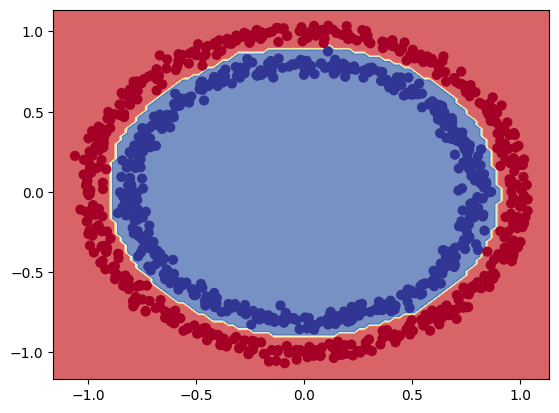

In [ ]:
plot_decision_boundary(model_2, X, Y)

<Axes: >

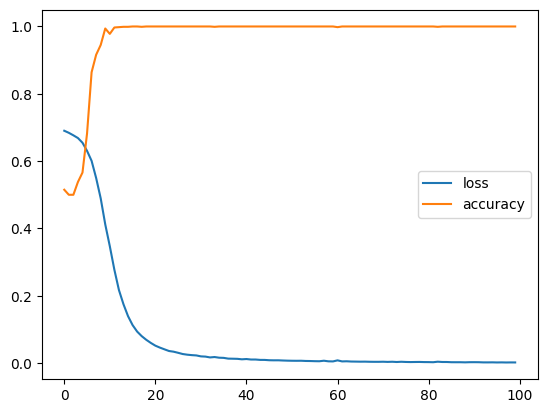

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
from keras.backend_config import epsilon
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(0), metrics = ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model_3.fit(X_train, Y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6929 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.4888 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.5025 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

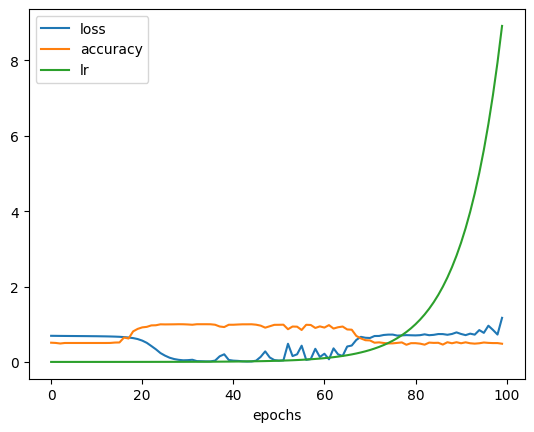

In [ ]:
pd.DataFrame(history.history).plot(xlabel = "epochs")

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model_3.predict(X_test)
cm = confusion_matrix(Y_test, tf.round(Y_pred))
cm.astype("float")

7/7 [==============================] - 0s 2ms/step


array([[ 98.,   0.],
       [102.,   0.]])

In [ ]:
print(cm.sum(axis = 1)[:, np.newaxis])
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]

[[ 98]
 [102]]


In [ ]:
cm_norm

array([[1., 0.],
       [1., 0.]])

Representing Confusion matrix


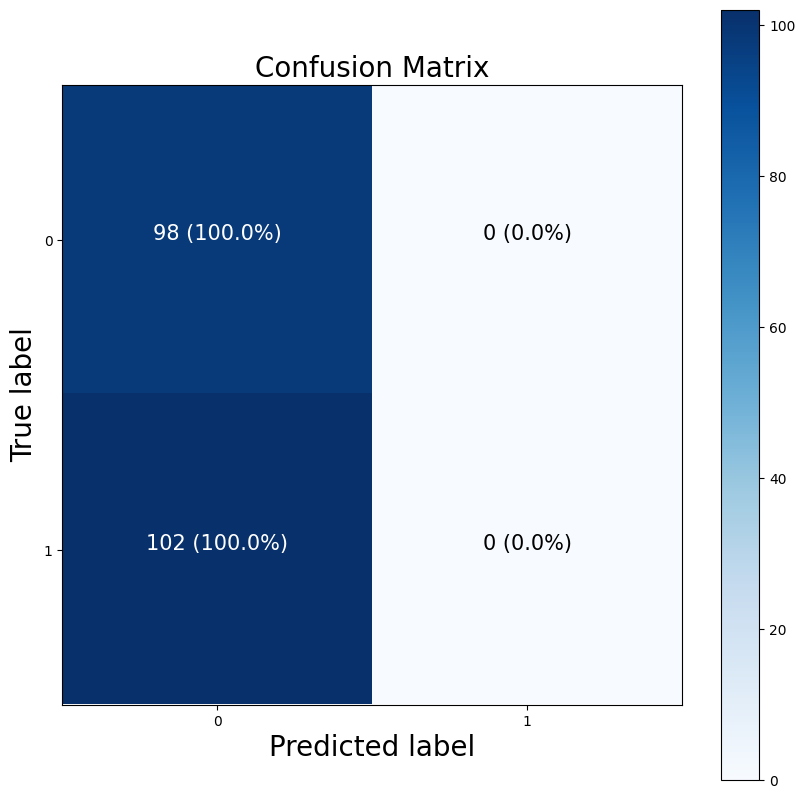

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(Y_test, tf.round(Y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()
train_label


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_name = ["T-shirt/top", "Trousres", "Pullovers", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle boot"]

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])
model_4.fit(train_data, train_label, epochs = 100, validation_data = (test_data, test_label))

Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0066 - accuracy: 0.7392 - val_loss: 0.6736 - val_accuracy: 0.7857
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6409 - accuracy: 0.7924 - val_loss: 0.8126 - val_accuracy: 0.7497
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5880 - accuracy: 0.7990 - val_loss: 0.6087 - val_accuracy: 0.7770
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5232 - accuracy: 0.8201 - val_loss: 0.5234 - val_accuracy: 0.8259
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4856 - accuracy: 0.8319 - val_loss: 0.5424 - val_accuracy: 0.8135
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4542 - accuracy: 0.8381 - val_loss: 0.4662 - val_accuracy: 0.8382
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4277 - accuracy: 0.8477 - val_loss: 0.4740 - val_

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
model_5.fit(train_data_norm, train_label, epochs = 20, validation_data = (test_data_norm, test_label))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5007 - accuracy: 0.8227 - val_loss: 0.4250 - val_accuracy: 0.8455
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3710 - accuracy: 0.8648 - val_loss: 0.4516 - val_accuracy: 0.8504
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8763 - val_loss: 0.3727 - val_accuracy: 0.8606
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3163 - accuracy: 0.8846 - val_loss: 0.3785 - val_accuracy: 0.8651
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2967 - accuracy: 0.8897 - val_loss: 0.3665 - val_accuracy: 0.8692
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2826 - accuracy: 0.8939 - val_loss: 0.3890 - val_accuracy: 0.8554
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2720 - accuracy: 0.8990 - val_loss: 0.3695 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(lr = 0), metrics = ["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))
model_6.fit(train_data_norm, train_label, epochs = 20, validation_data = (test_data_norm, test_label), callbacks = [lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7144 - accuracy: 0.7698 - val_loss: 0.5233 - val_accuracy: 0.8247 - lr: 1.0000e-04
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4626 - accuracy: 0.8413 - val_loss: 0.4711 - val_accuracy: 0.8379 - lr: 1.1220e-04
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4143 - accuracy: 0.8550 - val_loss: 0.4386 - val_accuracy: 0.8437 - lr: 1.2589e-04
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3853 - accuracy: 0.8644 - val_loss: 0.4117 - val_accuracy: 0.8548 - lr: 1.4125e-04
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3664 - accuracy: 0.8695 - val_loss: 0.4099 - val_accuracy: 0.8537 - lr: 1.5849e-04
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3498 - accuracy: 0.8759 - val_loss: 0.4130 - val_accuracy: 0.8536 - lr: 1.7783e-04
Epoch 7/20
1875/1875 [============

**Representation of Confusion Matrix for the multiclass problem**

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_prob = model_6.predict(test_data_norm)
y_preds = y_prob.argmax(axis = 1)
y_preds
y_prob

313/313 [==============================] - 1s 4ms/step


array([[3.1994896e-06, 4.7302301e-08, 5.5169307e-06, ..., 1.2503051e-02,
        6.4449741e-05, 9.7074288e-01],
       [6.2393974e-07, 4.5885306e-13, 9.9771315e-01, ..., 7.9813982e-11,
        1.1823239e-11, 4.1128088e-14],
       [7.7096765e-08, 9.9999982e-01, 5.7588989e-10, ..., 2.8269003e-22,
        3.2043990e-10, 4.0410693e-18],
       ...,
       [3.1037314e-03, 5.3523485e-07, 3.2413213e-03, ..., 7.2351789e-08,
        9.6889782e-01, 8.0214964e-09],
       [2.5928847e-07, 9.9999768e-01, 2.4246003e-07, ..., 6.4576836e-14,
        1.2493254e-07, 1.0020867e-11],
       [1.3405808e-04, 1.9993120e-06, 1.2249729e-04, ..., 2.9950493e-03,
        9.8679203e-04, 2.9652318e-05]], dtype=float32)

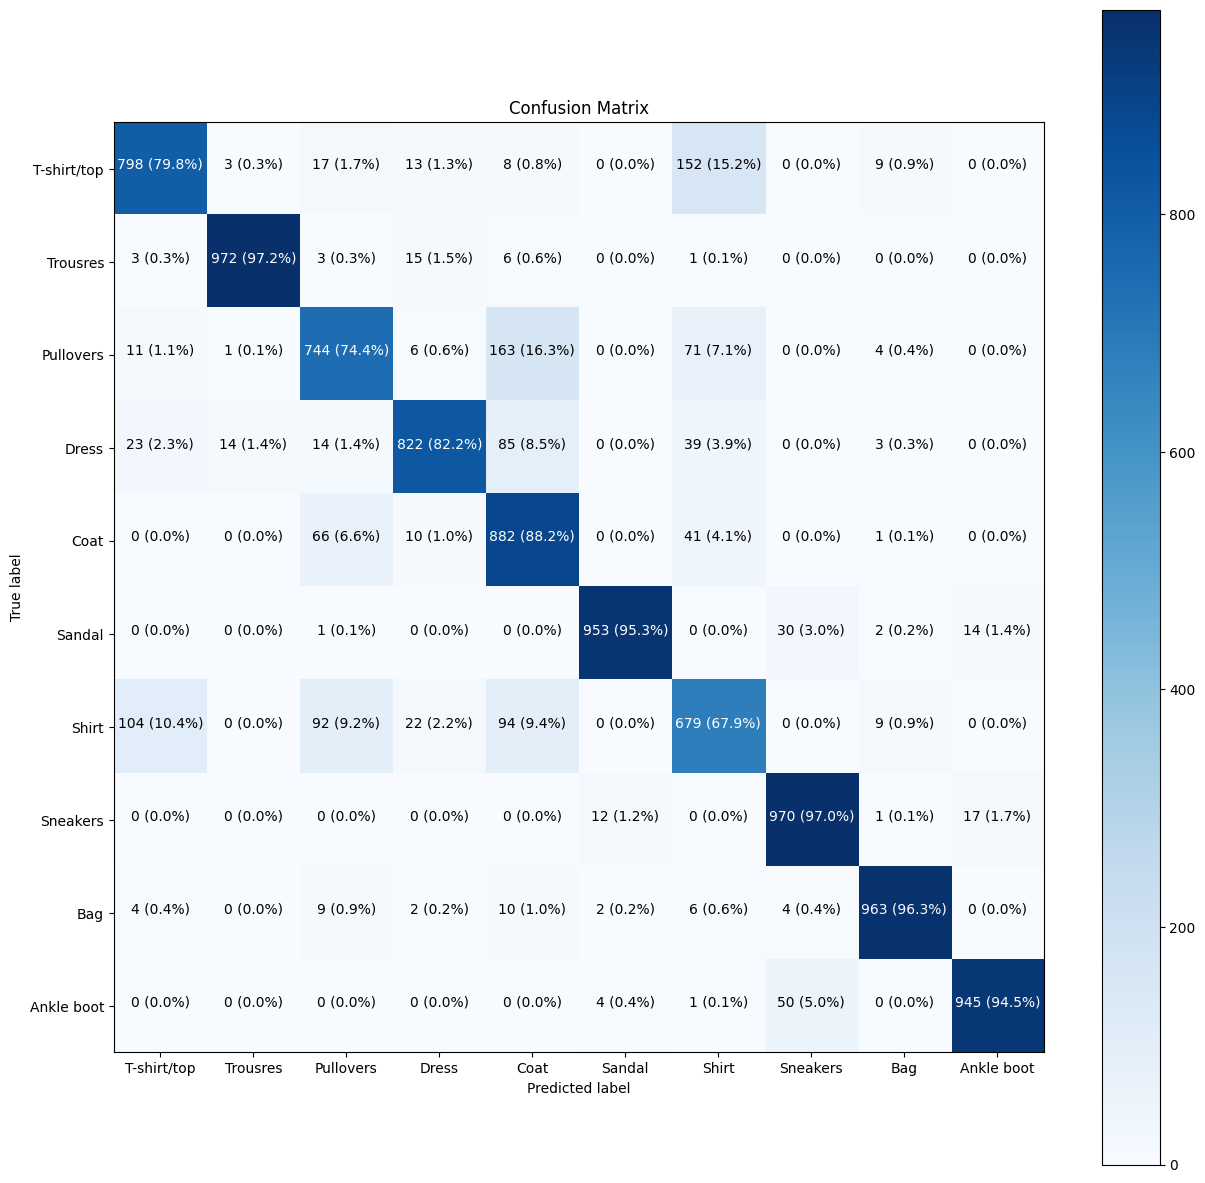

In [ ]:
make_confusion_matrix(y_true = test_label, y_pred =y_preds, classes = class_name, figsize = (15, 15), text_size = 10)

Visualization


In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 130ms/step


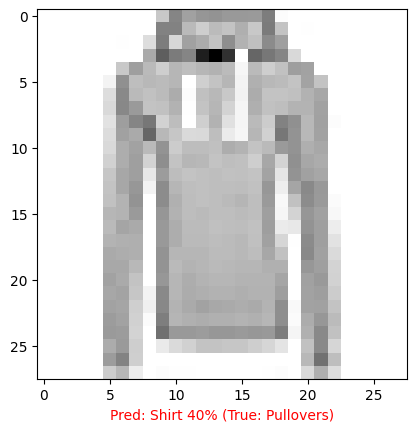

In [ ]:
plot_random_image(model= model_4, images = test_data_norm, true_labels = test_label, classes = class_name)

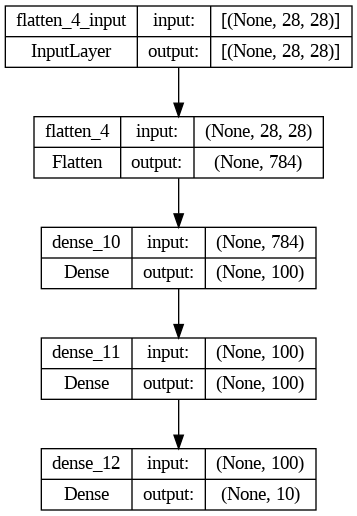

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True)